In [1]:
import sympy
from sympy import  Point, Line, Segment, Polygon, RegularPolygon
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
import matplotlib.pyplot as plt

In [2]:
def draw_polygon(polygon, names=None, color='g'):
    ax = plt.gca()
    ax.set_aspect('equal')
    vertices = polygon.vertices
    points_x = [item.x for item in vertices] + [vertices[0].x]
    points_y = [item.y for item in vertices] + [vertices[0].y]
    ax.plot(points_x, points_y, color)
    if names == None:
        for i, x_coord in enumerate(points_x[:-1]): 
            ax.annotate('A' + str(i + 1),
            xy=(x_coord, points_y[i] + 0.1), xycoords='data') # Координаты подписываемой точки, туда ведет стрелка
    else:
        for i, vert in enumerate(vertices): 
            ax.annotate(names[vert],
            xy=(points_x[i], points_y[i] + 0.1), xycoords='data') # Координаты подписываемой точки, туда ведет стрелка                   

# Занятие 9
# Алгебра
##  Geometry: многоугольники на плоскости, принадлежность точки многоугольнику.
### Задание 1.
Построить равнобедренный треугольник $ABC$ ($AB = BC$) с вершиной $B$ в начале координат, так что биссектриса $BD$ образует угол 45 градусов с положительным направлением оси $OX$ и 30 градусов со стороной $AB$, точка $A$ расположена между осью $OY$ и лучом $BD$,  длина $AC$ равна 3. 

У полученного треугольника вывести на экран длины сторон.

Указание: напротив угла 30 градусов в прямоугольном треугольнике лежит катет, равный половине гипотенузы, в равнобедренном треугольнике биссектриса, проведенная к основанию, является медианой и высотой. Координаты точки равны произведению длины отрезка, соединяющего точку с началом координат и косинуса (синуса) угла, образованного этим отрезком и положительным направлением горизонтальной оси.

In [3]:
# ДАНО:
B = Point(0, 0)
ang_BD_OX = Pi/4
ang_BD_AB = Pi/6
# т. А между осью OY и лучом BD
AC = 3

In [4]:
tempCalc1, tempCalc2 = 3*Cos(ang_BD_OX - ang_BD_AB), 3*Sin(ang_BD_OX - ang_BD_AB)

C = Point(tempCalc1, tempCalc2)
A = Point(tempCalc2, tempCalc1)
D = Point((A.x + C.x)/2, (A.y + C.y)/2)
D1 = D # нужно для задачи 3

ABC = Polygon(A, B, C, D)
tempPoly = Polygon(B, C, D)

sidesList = ABC.sides
for side in sidesList:
  display(side.length.simplify())
  print()

3

3

3

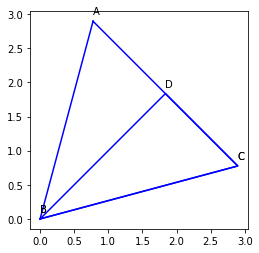

In [5]:
point_dict = {A: 'A', B: 'B', C: 'C', D: 'D'}

draw_polygon(ABC, names = point_dict, color = 'b')
draw_polygon(tempPoly, names = {B: 'B', C: 'C', D: 'D'}, color = 'b')

### Задание 2.
Построить четырехугольник $ABCD$, где точки $A$, $B$ и $C$ из Задания 1, а точка $D$ - центр $ABC$. Найти площадь, периметр и центр $ABCD$.
Изобразить $ABC$ и $ABCD$ на графике. Выпуклый ли многоугольник?

In [6]:
D = ABC.centroid
D2 = D # нужно для задачи 3
ABCD = Polygon(A, B, C, D)

print("площадь ABCD:")
display(ABCD.area)

print("\nпериметр ABCD:")
display(ABCD.perimeter)

print("\nцентр ABCD:")
display(ABCD.centroid)

площадь ABCD:


3*sqrt(3)/2


периметр ABCD:


2*sqrt(3) + 6


центр ABCD:


Point2D(5*sqrt(6)/12, 5*sqrt(6)/12)

ответ: нет, четырёхугольник ABCD - вогнутый.


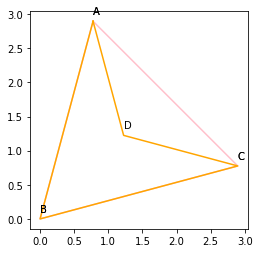

In [7]:
point_dict = {A: 'A', B: 'B', C: 'C'}
draw_polygon(ABC, names = point_dict, color = 'pink')

point_dict[D] = 'D'
draw_polygon(ABCD, names = point_dict, color = 'orange')

if(ABCD.is_convex()):
    print("ответ: да, четырёхугольник - выпуклый.")
else:
    print("ответ: нет, четырёхугольник ABCD - вогнутый.")

### Задание 3
Постоить ромб $ALCD$ с точками $A$, $C$ и $D$ из Заданий 1 и 2. Найти общую часть треугольника $BLC$ и ромба и вывести на экран в виде имен точек, отрезков и т.п., изобразить на графике  треугольник зеленым, ромб - фиолетовым. 

Указание: диагонали ромба пересекаются в серединах; имя точки искать в словаре имен.

Point2D(sqrt(6)/2, sqrt(6)/2)

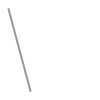

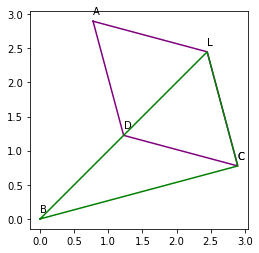

In [8]:
# найдём координаты точки L, как сумму координат D1 и разности координат D1 и D2, т. е. D1+(D1-D2)
L = Point(D1.x + (D1.x - D2.x), D1.y + (D1.y - D2.y))

ALCD = Polygon(A, L, C, D)
point_dict = {A: 'A', L: 'L', C: 'C', D: 'D'}
draw_polygon(ALCD, names = point_dict, color = 'purple')

BLC = Polygon(B, L, C)
point_dict = {B: 'B', L: 'L', C: 'C'}
draw_polygon(BLC, names = point_dict)

display(*ALCD.intersection(BLC))

### Индивидуальное задание

Построить на одном графике правильный треугольник, шестиугольник и восьмиугольник с радиусом описанной окружности $R$, центром в точке $O$.

Повернуть треугольник на $\alpha$ градусов, изобразить старый и новый треугольники на одном графике.

Найти общую область правильного шестиугольника и его копии, повернутой на угол $\beta$ градусов.

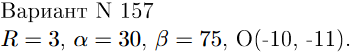

In [9]:
# ДАНО:
R = 3
α = Pi/6
β = 75*Pi/180
O = Point(-10, -11)

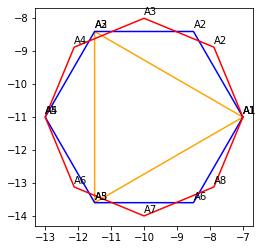

In [10]:
myTriangle = RegularPolygon(O, R, 3)
myTurnedTriangle = myTriangle  # понадобится в ячейке ниже
myHexagon = RegularPolygon(O, R, 6)
myTurnedHexagon = myHexagon  # понадобится в ячейке ниже
myOctagon = RegularPolygon(O, R, 8)

draw_polygon(myTriangle, color = 'orange')  # оранжевый треугольник
draw_polygon(myHexagon, color = 'blue')  # синий гексагон
draw_polygon(myOctagon, color = 'red')  # красный октагон

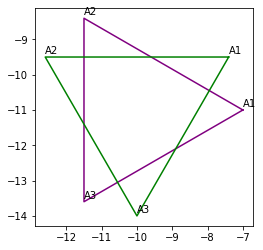

In [11]:
# НЕ ПЕРЕЗАПУСКАТЬ (при перезапуске треугольник каждый раз поворачивается от нового угла)
draw_polygon(myTriangle, color = 'purple')
myTurnedTriangle.spin(α)
draw_polygon(myTurnedTriangle)

[Segment2D(Point2D(-10 - 3*sqrt(2)/2, -11 + 3*sqrt(2)/2), Point2D(-10 - 3*sqrt(6)/4 - 3*sqrt(2)/4, -11 - 3*sqrt(6)/4 + 3*sqrt(2)/4)),
 Segment2D(Point2D(-10 + 3*sqrt(2)/2, -11 - 3*sqrt(2)/2), Point2D(-10 + 3*sqrt(2)/4 + 3*sqrt(6)/4, -11 - 3*sqrt(2)/4 + 3*sqrt(6)/4)),
 Segment2D(Point2D(-10 - 3*sqrt(2)/4 + 3*sqrt(6)/4, -11 + 3*sqrt(2)/4 + 3*sqrt(6)/4), Point2D(-10 - 3*sqrt(2)/2, -11 + 3*sqrt(2)/2)),
 Segment2D(Point2D(-10 - 3*sqrt(6)/4 + 3*sqrt(2)/4, -11 - 3*sqrt(6)/4 - 3*sqrt(2)/4), Point2D(-10 + 3*sqrt(2)/2, -11 - 3*sqrt(2)/2)),
 Segment2D(Point2D(-10 + 3*sqrt(2)/4 + 3*sqrt(6)/4, -11 - 3*sqrt(2)/4 + 3*sqrt(6)/4), Point2D(-10 - 3*sqrt(2)/4 + 3*sqrt(6)/4, -11 + 3*sqrt(2)/4 + 3*sqrt(6)/4)),
 Segment2D(Point2D(-10 - 3*sqrt(6)/4 - 3*sqrt(2)/4, -11 - 3*sqrt(6)/4 + 3*sqrt(2)/4), Point2D(-10 - 3*sqrt(6)/4 + 3*sqrt(2)/4, -11 - 3*sqrt(6)/4 - 3*sqrt(2)/4))]

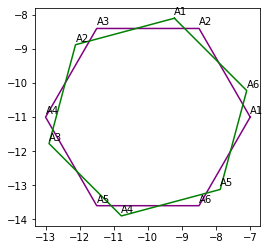

In [12]:
# НЕ ПЕРЕЗАПУСКАТЬ (при перезапуске шестиугольник каждый раз поворачивается от нового угла)
draw_polygon(myHexagon, color = 'purple')
myTurnedHexagon.spin(β)
draw_polygon(myTurnedHexagon)
display(myHexagon.intersection(myTurnedHexagon))

Хорасанджян Левон, вариант №157